### Гусев Владислав БПМИ187-1

### 1 пнукт задачи:

In [5]:
def transform(matrix, n, k):
    # Нам нужно создать для каждой вершины графа k переменных:
    # x11 .. x1k
    #    ...
    # xn1 .. xnk
    
    # функция, которая вычисляет номер перменной, отвечаюдей за v вершину и ее цвет j
    def get_index(v, j):
        return v * k + j + 1
    
    # Далее описываются 3 условия для создания КНФ, решающее раскраску графа
    clauses = []
    
    # Хотя бы одна из k переменных, отвечающих за вершину должна быть 1
    # x_11 or ... or x_1k = 1
    # ...
    # x_n1 or ... or x_nk = 1
    for v in range(n):
        temp_list = []
        for i in range(k):
            temp_list.append(get_index(v, i))
        clauses.append(temp_list)
    
    # При этом они должнны быть попарно различными:
    # поэтому добавляем попарное орицание
    # not x_i1 or not x_ij
    # ...
    # not x_i(k-1) or not x_ik
    for v in range(n):
        for c1 in range(k):
            for c2 in range(c1 + 1, k):
                clause = [-get_index(v, c1), -get_index(v, c2)]
                clauses.append(clause)
    
    # Соседение ребра(те, что соеденены ребрем) должны иметь разные цвета:
    # not x_ik v not x_jk, (u, v) in E
    for v in range(n):
        for u in range(v, n):
            if matrix[v][u]:
                for i in range(k):
                    clause = [-get_index(v, i), -get_index(u, i)]
                    clauses.append(clause)
    return clauses   

In [6]:
# функция, создающая таблицу смежности из данных входного файла
def create_data_graph(file):
    data_graph = []
    n, m = 0, 0
    flag = True
    for line in file:
        if flag:
            n, m = map(int, line.strip('\n').split())
            flag = False
            for i in range(n):
                data_graph.append(list())
                for j in range(n):
                    data_graph[i].append(0)
        else:
            f, s = map(int, line.strip('\n').split())
            f -= 1
            s -= 1
            data_graph[f][s] = 1
            data_graph[s][f] = 1

    return data_graph, n, m

In [7]:
import pysat
from pysat import solvers

# Функция, вычисляющая хроматическое число графа
# Выводит самое хроматическое число k и модель
def find_chrom_k(matrix, n):
    flag = False
    k = 0
    while (flag == False):
        k += 1
        solver = solvers.Glucose3()
        clauses = transform(matrix, n, k)
        for clause in clauses:
            solver.add_clause(clause)
        flag = solver.solve()
        model = solver.get_model()
    return k, model

In [8]:
import os

# Основная часть программы

# перебираем все входные файлы
for i in range(1, 31):
    if 1 <= i <= 9:
        filename = "0" + str(i) + ".in"
    else:
        filename = str(i) + ".in"
    file = open(filename, 'r')
    #open("{:2d}.in".format(i), 'r'
    # Создаем таблицу смежности
    matrix, n, m = create_data_graph(file)
    
    # Далее ищем хроматическое число графа
    model = list()
    k, model = find_chrom_k(matrix, n)
    
    # Создаем файл файл для ответа и помещаем в него сам ответ
    ans = open(filename[:-3] + ".ans", 'w')
    ans.write(str(k) + '\n')
    temp_string = str()

    for v in range(n):
        for c in range(k):
            if model[v*k + c] > 0:
                temp_string = temp_string + str(c + 1) + " " 
    temp_string = temp_string[:-1]
    ans.write(temp_string)
    
    file.close()
    ans.close()

In [9]:
# Проверка работы моей программы на 30 представленных тестах
print("Проверка ответов в файле 1")
!python3 check.py 01.in 01.ans
print("Проверка ответов в файле 2")
!python3 check.py 02.in 02.ans
print("Проверка ответов в файле 3")
!python3 check.py 03.in 03.ans
print("Проверка ответов в файле 4")
!python3 check.py 04.in 04.ans
print("Проверка ответов в файле 5")
!python3 check.py 05.in 05.ans
print("Проверка ответов в файле 6")
!python3 check.py 06.in 06.ans
print("Проверка ответов в файле 7")
!python3 check.py 07.in 07.ans
print("Проверка ответов в файле 8")
!python3 check.py 08.in 08.ans
print("Проверка ответов в файле 9")
!python3 check.py 09.in 09.ans
print("Проверка ответов в файле 10")
!python3 check.py 10.in 10.ans
print("Проверка ответов в файле 11")
!python3 check.py 11.in 11.ans
print("Проверка ответов в файле 12")
!python3 check.py 12.in 12.ans
print("Проверка ответов в файле 13")
!python3 check.py 13.in 13.ans
print("Проверка ответов в файле 14")
!python3 check.py 14.in 14.ans
print("Проверка ответов в файле 15")
!python3 check.py 15.in 15.ans
print("Проверка ответов в файле 16")
!python3 check.py 16.in 16.ans
print("Проверка ответов в файле 17")
!python3 check.py 17.in 17.ans
print("Проверка ответов в файле 18")
!python3 check.py 18.in 18.ans
print("Проверка ответов в файле 19")
!python3 check.py 19.in 19.ans
print("Проверка ответов в файле 20")
!python3 check.py 20.in 20.ans
print("Проверка ответов в файле 21")
!python3 check.py 21.in 21.ans
print("Проверка ответов в файле 22")
!python3 check.py 22.in 22.ans
print("Проверка ответов в файле 23")
!python3 check.py 23.in 23.ans
print("Проверка ответов в файле 24")
!python3 check.py 24.in 24.ans
print("Проверка ответов в файле 25")
!python3 check.py 25.in 25.ans
print("Проверка ответов в файле 26")
!python3 check.py 26.in 26.ans
print("Проверка ответов в файле 27")
!python3 check.py 27.in 27.ans
print("Проверка ответов в файле 28")
!python3 check.py 28.in 28.ans
print("Проверка ответов в файле 29")
!python3 check.py 29.in 29.ans
print("Проверка ответов в файле 30")
!python3 check.py 30.in 30.ans

Проверка ответов в файле 1
Ok!
Проверка ответов в файле 2
Ok!
Проверка ответов в файле 3
Ok!
Проверка ответов в файле 4
Ok!
Проверка ответов в файле 5
Ok!
Проверка ответов в файле 6
Ok!
Проверка ответов в файле 7
Ok!
Проверка ответов в файле 8
Ok!
Проверка ответов в файле 9
Ok!
Проверка ответов в файле 10
Ok!
Проверка ответов в файле 11
Ok!
Проверка ответов в файле 12
Ok!
Проверка ответов в файле 13
Ok!
Проверка ответов в файле 14
Ok!
Проверка ответов в файле 15
Ok!
Проверка ответов в файле 16
Ok!
Проверка ответов в файле 17
Ok!
Проверка ответов в файле 18
Ok!
Проверка ответов в файле 19
Ok!
Проверка ответов в файле 20
Ok!
Проверка ответов в файле 21
Ok!
Проверка ответов в файле 22
Ok!
Проверка ответов в файле 23
Ok!
Проверка ответов в файле 24
Ok!
Проверка ответов в файле 25
Ok!
Проверка ответов в файле 26
Ok!
Проверка ответов в файле 27
Ok!
Проверка ответов в файле 28
Ok!
Проверка ответов в файле 29
Ok!
Проверка ответов в файле 30
Ok!


Как мы видим, все тесты пройдены

### Теперь перейдем ко 2 пункту

In [10]:
import random
import time

# Создаем функцию, которая создает таблицы смежности для графов,
# с количеством вершин n и
# и вероятностью в % на наличие ребра между двумя любимыми вершинами 
def matrix_generator(n, percent):
    matrix = list()
    
    for i in range(n):
        matrix.append([])
        for j in range(n):
            if i != j:
                percent_temp = random.randint(1, 100)
                if percent_temp <= percent:
                    matrix[i].append(1)
                else:
                    matrix[i].append(0)
            else:
                matrix[i].append(0)
    return matrix

# пройдемся по вершинам от 5 до 11 и
# вероятностю от 10% до 100%
print("n", "k", "Время работы(секунды)", sep='\t')
for n in range(5, 11):
    for percent in range(10, 101, 10):
        start_time = time.time()
        matrix = matrix_generator(n, percent)
        #print(n, matrix)
        k, model = find_chrom_k(matrix, n)
        print(n, k, time.time() - start_time, sep='\t')

n	k	Время работы(секунды)
5	2	0.0007050037384033203
5	2	0.0001938343048095703
5	2	0.00018405914306640625
5	1	0.00010418891906738281
5	3	0.00032591819763183594
5	4	0.0004968643188476562
5	3	0.0003199577331542969
5	4	0.0004801750183105469
5	3	0.00030112266540527344
5	5	0.0016429424285888672
6	2	0.0001850128173828125
6	2	0.00017404556274414062
6	2	0.0002048015594482422
6	2	0.00017905235290527344
6	3	0.0003440380096435547
6	3	0.0004138946533203125
6	5	0.0008718967437744141
6	5	0.0007958412170410156
6	6	0.0015952587127685547
6	6	0.0014972686767578125
7	1	0.00011324882507324219
7	2	0.00019097328186035156
7	3	0.0003199577331542969
7	3	0.0003478527069091797
7	3	0.0003459453582763672
7	3	0.00034999847412109375
7	3	0.00037097930908203125
7	4	0.0005841255187988281
7	5	0.0009846687316894531
7	7	0.0058019161224365234
8	2	0.00024199485778808594
8	2	0.00022101402282714844
8	2	0.00022292137145996094
8	3	0.0003669261932373047
8	3	0.0005328655242919922
8	3	0.00041174888610839844
8	7	0.006632089614868164

error: Caught keyboard interrupt

Теперь, как мы видим, все полные графы обрабатываются заметно дольше, чем любые другие графы, поэтому дальше их рассматривать не будем(так как их обработка занимает очень большое время при больших n)

In [28]:
# пройдемся по 100 вершинам в графе
# вероятностю от 1% до 15%
print("n", "k", "Время работы(секунды)", sep='\t')
for n in range(100, 101):
    for percent in range(1, 15, 1):
        start_time = time.time()
        matrix = matrix_generator(n, percent)
        #print(n, matrix)
        k, model = find_chrom_k(matrix, n)
        print(n, k, time.time() - start_time, sep='\t')

n	k	Время работы(секунды)
100	3	0.019104719161987305
100	3	0.016195058822631836
100	3	0.015301942825317383
100	3	0.014834165573120117
100	4	0.017879962921142578
100	4	0.017977237701416016
100	4	0.01951003074645996
100	4	0.02037787437438965
100	5	0.21526503562927246
100	5	0.06463980674743652
100	5	0.10585594177246094
100	5	0.05473685264587402
100	5	1.1940948963165283
100	6	31.555294036865234


Как видно, с увеличением хроматического числа, время работы заметно возрастет

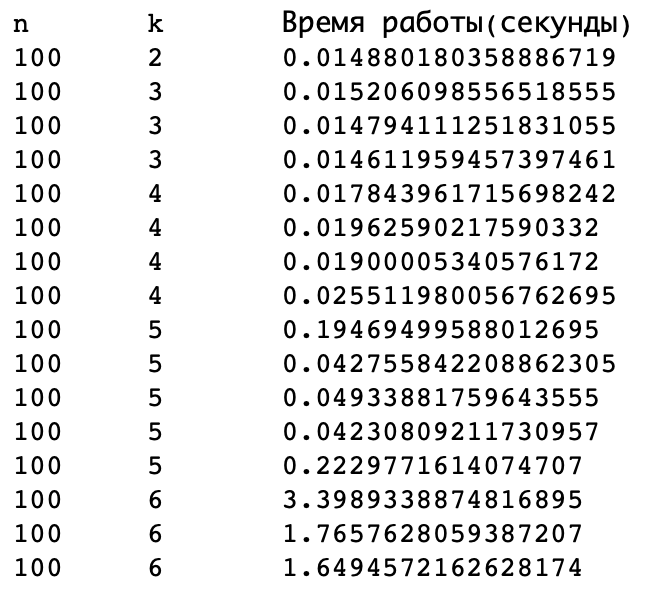

In [24]:
from IPython.display import Image
Image("screenshots/1.png")

Как мы видим, что с увеличинемем хроматического числа, время обработки увеличивается
Так, если хроматическое число составляет до 5% от количества вершин, то время обработки очень мало. Но если же хроматическое число составляет более 5% от количества вершин, то время обработки сильно увеличивается.

In [ ]:
# пройдемся по 50 вершинам в графе
# вероятностю от 1% до 15%
print("n", "k", "Время работы(секунды)", sep='\t')
for n in range(50, 51):
    for percent in range(1, 30, 1):
        start_time = time.time()
        matrix = matrix_generator(n, percent)
        #print(n, matrix)
        k, model = find_chrom_k(matrix, n)
        print(n, k, time.time() - start_time, sep='\t')

In [ ]:
import networkx as nx

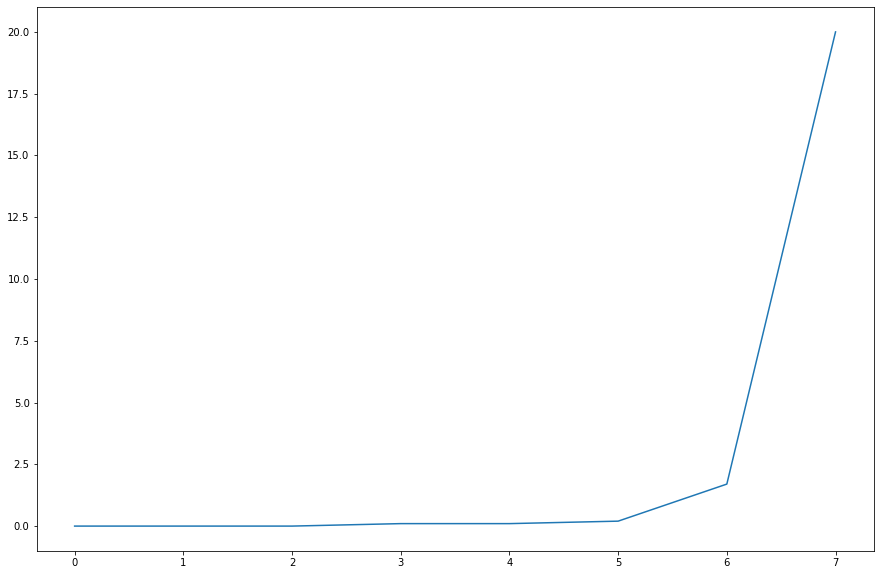

In [55]:
import matplotlib.pyplot as plt
from matplotlib import rcParams

figsize = (15,10)

fig = plt.figure(figsize=figsize, frameon=True)
plt.plot([[0],[0],[0], [0.1], [0.1], [0.2], [1.7], [20]])

plt.show()